<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/215_rng.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(rng-appendix)=
# Generazione di numeri casuali

In questo insegnamento introdurremo molti concetti tramite la simulazione. Pertanto deve essere ben chiaro come sia possibile generare numeri casuali da varie distribuzioni di probabilità. In questo capitolo esamineremo [NumPy](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) dato che questo modulo offre generatori di numeri casuali per tutte le principali distribuzioni di probabilità. 

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy.constants import golden
import scipy.stats as stats

In [11]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


Tutto ciò che succede sul nostro computer è generato da un algoritmo. L'algoritmo che genera i numeri "casuali" su computer è necessariamente deterministico. Questo diventa chiaro quando notiamo che otteniamo sempre lo stesso insieme di numeri casuali quando usiamo lo stesso seme (punto di partenza), su qualsiasi macchina o per diverse ripetizioni sulla stessa macchina. Per generare un numero veramente casuale sui nostri computer è necessario  ottenere dei dati casuali da una fonte esterna; questa fonte esterna può essere la nostra sequenza di tasti, i movimenti del mouse, i dati sulla rete, ecc. La necessità di ottenere dei numeri *veramente* casuali nasce solo in contesti specifici, per esempio nei contesti legati alla sicurezza (crittografia, ecc.). Per gli scopi della *data science*, invece, sono sufficienti i numeri pseudo-casuali generati dal computer. In Python, il principale generatore di numeri (pseudo)casuali è NumPy.

Il generatore `rng` può usare una serie di metodi per generare numeri casuali estratti da una varietà di distribuzioni di probabilità. Oltre agli argomenti specifici della distribuzione, ogni metodo prende un argomento `size` il cui valore predefinito è `None`. Se `size` è `None`, viene generato e restituito un singolo valore. Se `size` è un numero intero, viene restituito un array 1-D riempito con i valori generati.

## Distribuzione uniforme

Consideriamo la distribuzione uniforme: `uniform([low, high, size])`. Genero un singolo valore:

Lo genero una seconda volta:

In [29]:
rng.uniform(0, 1, size=1)

array([0.92512012])

Genero 20 valori:

In [20]:
rng.uniform(0, 1, size=20)

array([0.96917638, 0.7787509 , 0.71689019, 0.4493615 , 0.27224156,
       0.09639096, 0.9026024 , 0.45577629, 0.20236336, 0.30595662,
       0.57921957, 0.17677278, 0.85661428, 0.75851953, 0.71946296,
       0.43209304, 0.62730884, 0.58409797, 0.6498466 , 0.08444432])

Creo un istogramma.

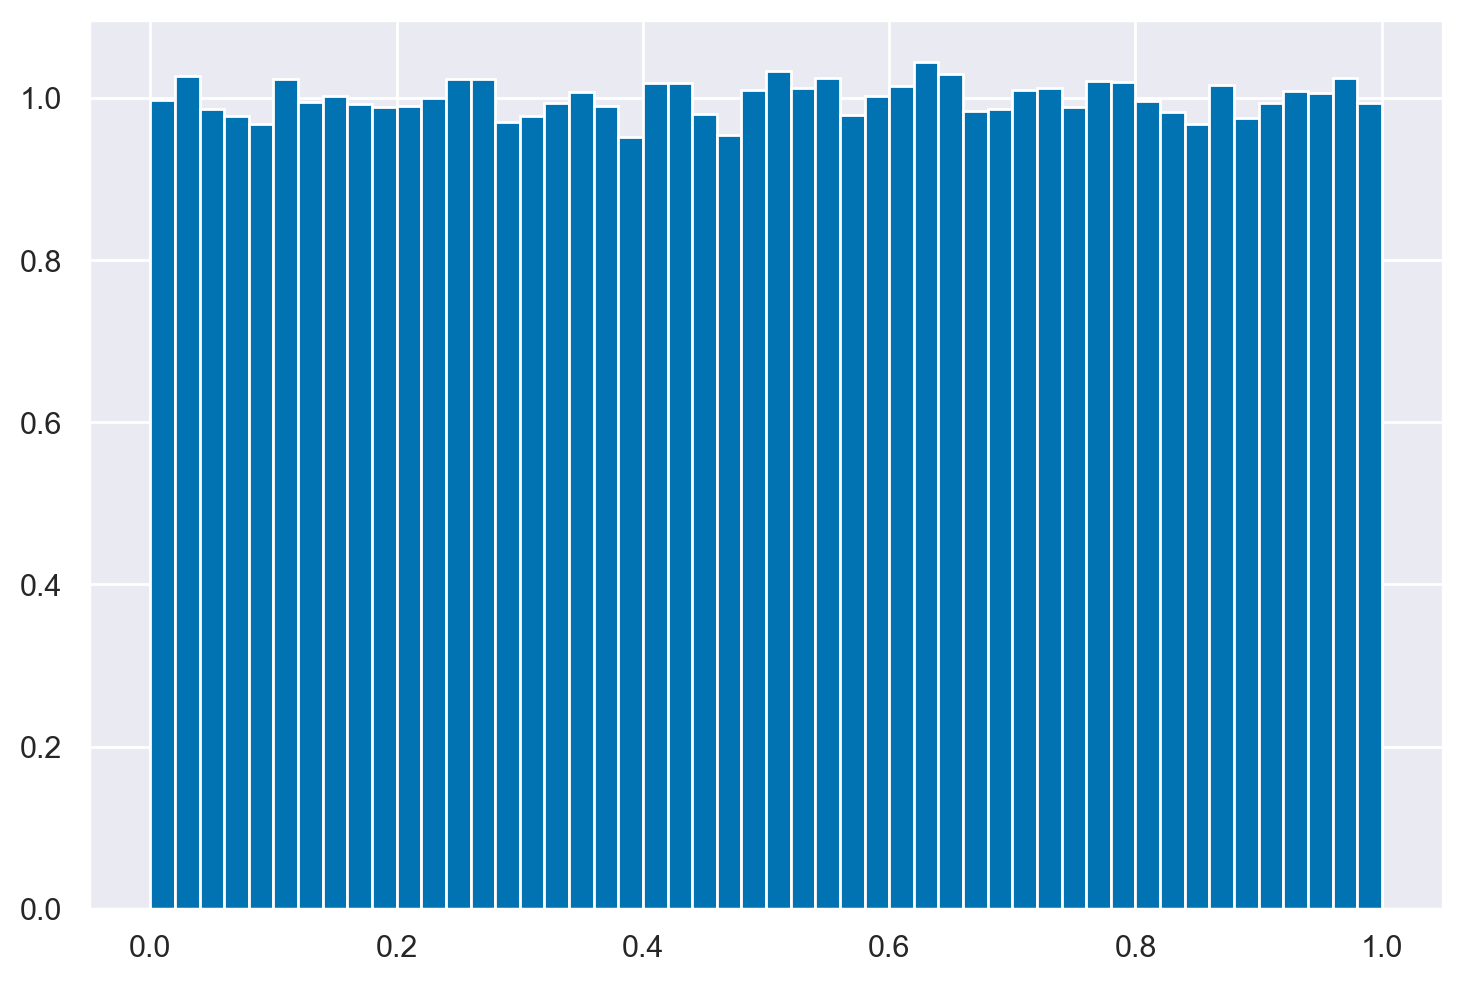

In [30]:
_ = plt.hist(rng.uniform(0, 1, size=100000), bins=50, density=True)

## Distribuzione normale

Estraiamo ora dei campioni casuali dalla distribuzione Gaussiana, `normal([loc, scale, size])`. Per esempio, generiamo 10 valori dalla distribuzione $\mathcal{N}(\mu = 100, \sigma = 15)$:

In [33]:
x = rng.normal(loc=100, scale=15, size=10)
print(x)

[101.41493261  91.57468176  84.77668414  77.45113302  83.97445323
  95.72536689 114.56394447 106.37497967  85.36470391  90.96931277]


Ora genero un grande numero (1000000) di valori casuali dalla $\mathcal{N}(\mu = 100, \sigma = 15)$. Con questi valori creo un istogramma e a tale istogramma sovrappongo la funzione di densità $\mathcal{N}(\mu = 100, \sigma = 15)$. In questo modo posso accertarmi che i numeri casuali  che ho ottenuto si riferiscano veramente alla densità desiderata. Per trovare la densità della distribuzione normale, uso `norm.pdf` da `scipy.stats`. Si noti `rng.normal()` per la generazione dei numeri casuali.

(40.0, 160.0)

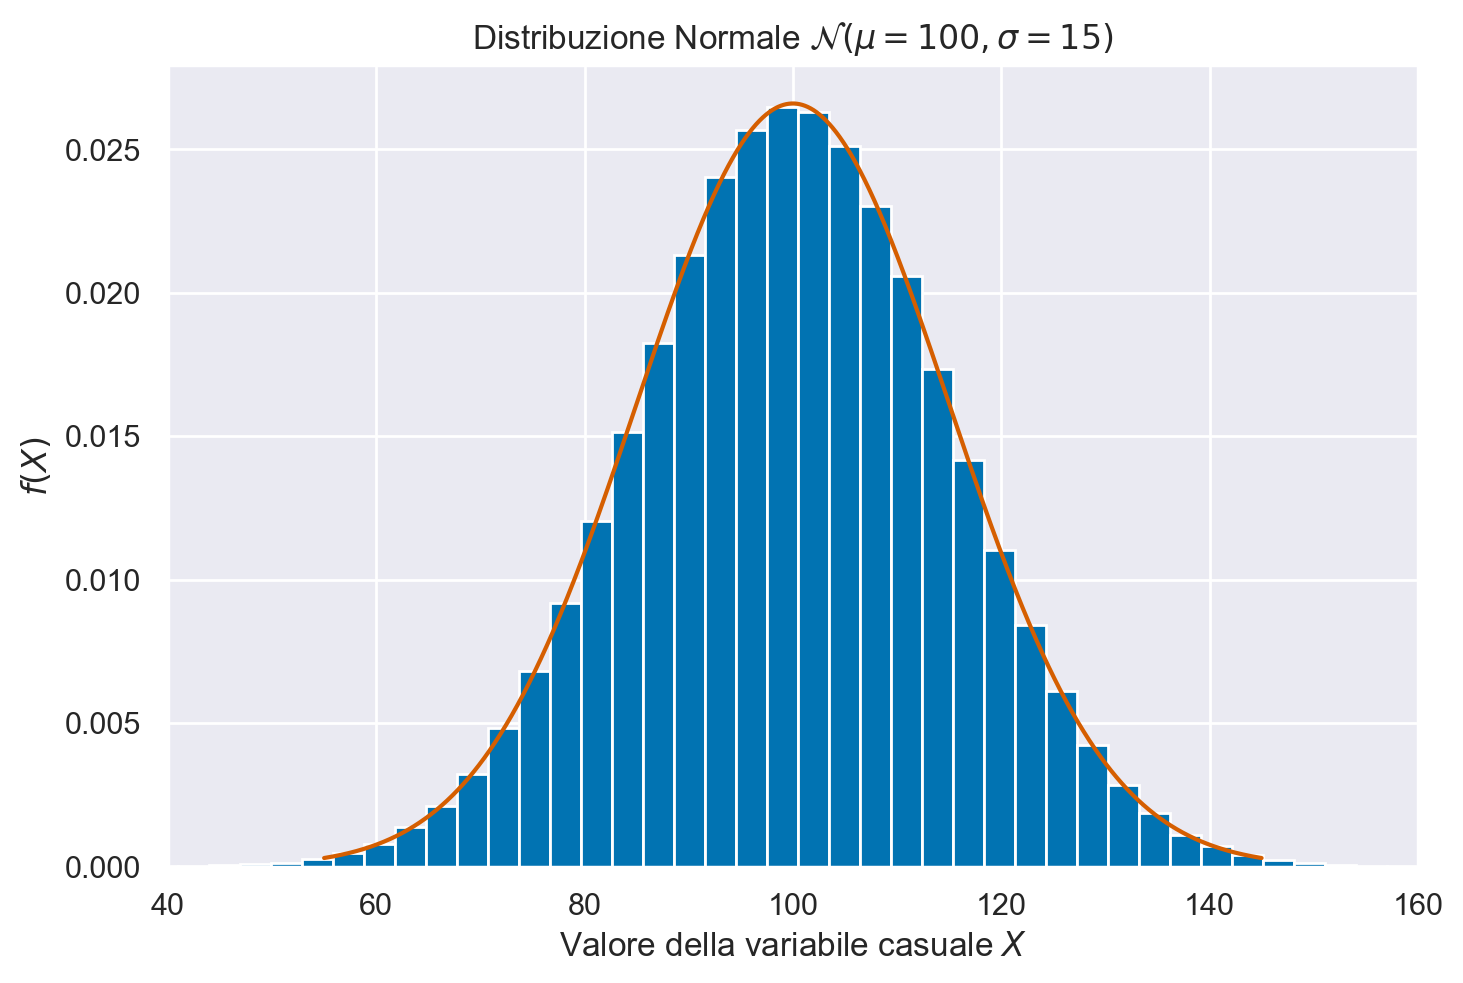

In [35]:
n = 1000000
mu = 100
sigma = 15
# create x's
xs = np.linspace(55, 145, 100001)
y_pdf = stats.norm.pdf(xs, mu, sigma)
# create random samples
samps = rng.normal(loc=mu, scale=sigma, size=n)
# plot them
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Normale $\mathcal{N}(\mu=100, \sigma=15)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(40, 160)

La stessa procedura può essere usata per tutte le [distribuzioni](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) implementate da NumPy. Presento alcuni esempi qui sotto.

## Distribuzione Beta

Per estrarre dei campioni casuali dalla distribuzione Beta uso il generatore `rng` con `beta(a, b[, size])`; per la densità Beta uso `beta.pdf` da `scipy.stats`.

Text(0.5, 0, 'Valore della variabile casuale $X$')

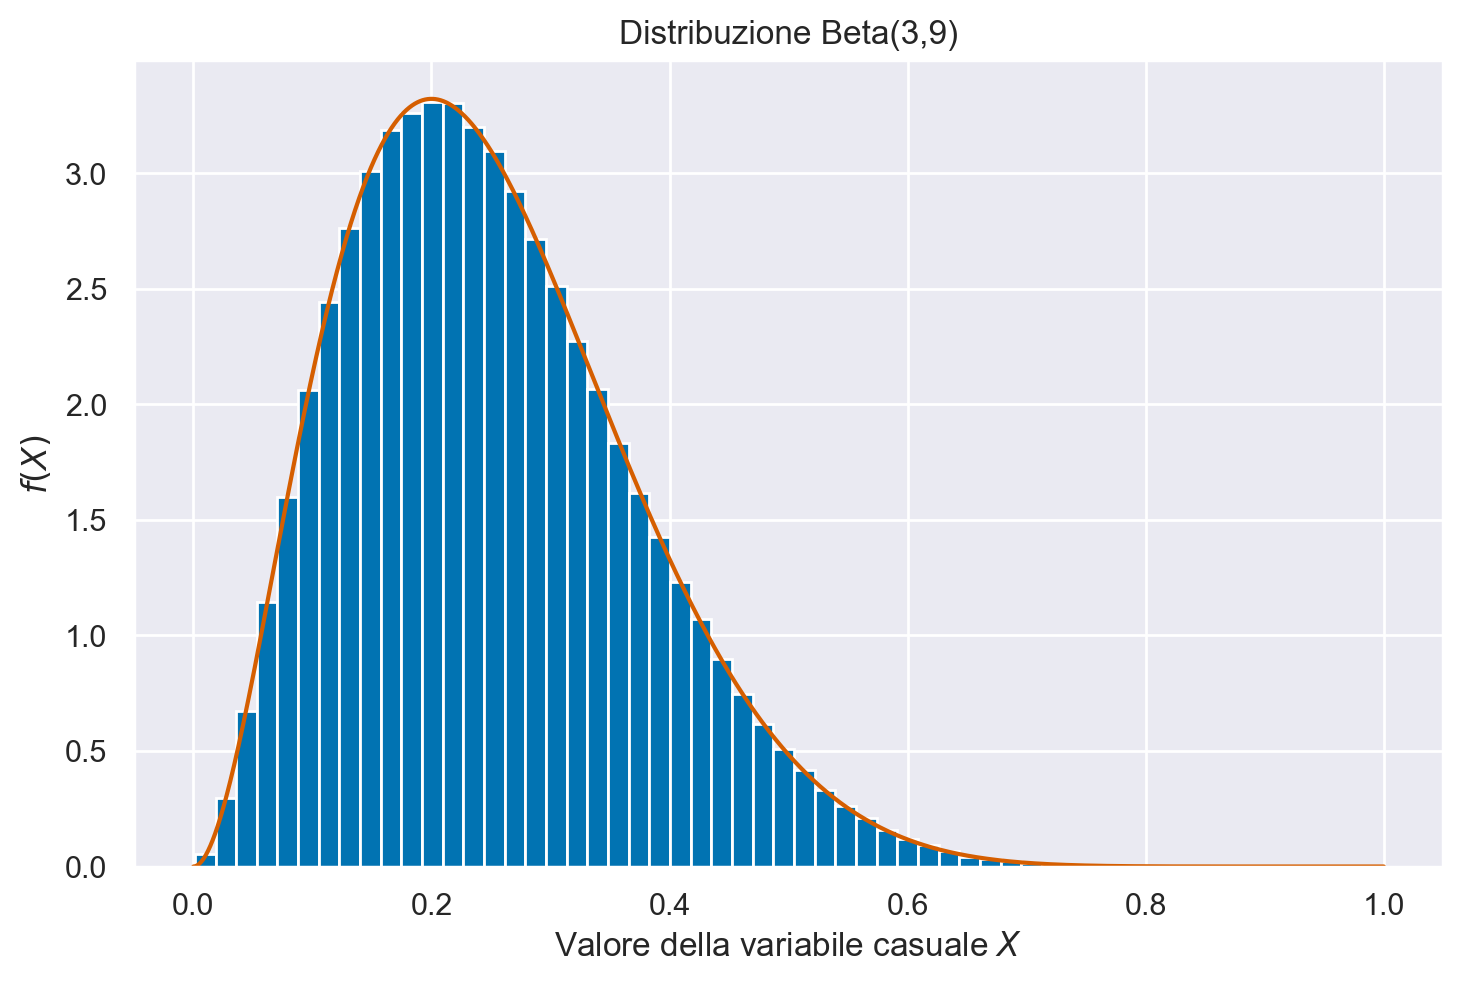

In [36]:
a = 3
b = 9
# create x's
xs = np.linspace(0, 1, 100001)
y_pdf = stats.beta.pdf(xs, a, b)
# create random samples
samps = rng.beta(a=a, b=b, size=n)
# plot them
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Beta(3,9)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")

## Distribuzione binomiale

Per estrarre dei campioni casuali dalla distribuzione Binomiale uso il generatore `rng` con `binomial(n, p[, size])`; per la distribuzione di massa Binomiale uso `binom.pmf` da `scipy.stats`.

Text(0.5, 0, 'Valore della variabile casuale $X$')

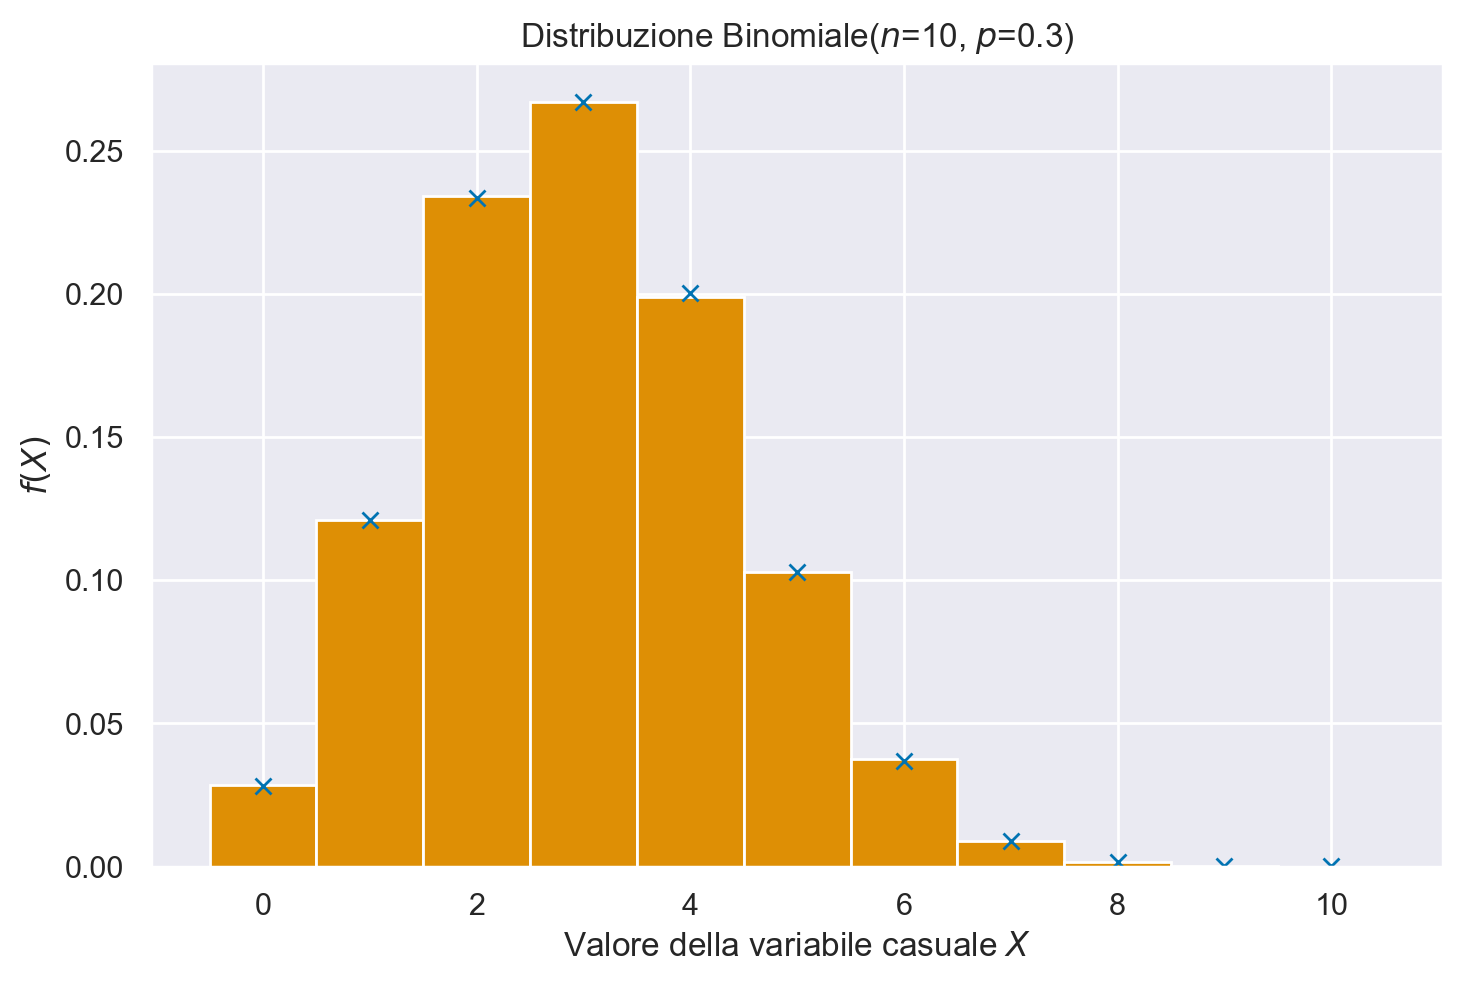

In [37]:
n = 10
p = 0.3
n_samples = 100001
# create r values
r_values = list(range(n + 1))
# pmf
y_pmf = [stats.binom.pmf(r, n, p) for r in r_values]
# create random samples
r_samps = rng.binomial(n=n, p=p, size=n_samples)
plt.plot(r_values, y_pmf, "x")
plt.hist(r_samps, bins=np.arange(-0.5, 11.5, 1), density=True)
plt.title("Distribuzione Binomiale($n$=10, $p$=0.3)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")

## Distribuzione $t$ di Student

Per estrarre dei campioni casuali dalla distribuzione $t$ di Student uso il generatore `rng` con `standard_t(df, size=None)`; per la densità $t$ di Student uso `t.pdf` da `scipy.stats`.

(-4.0, 4.0)

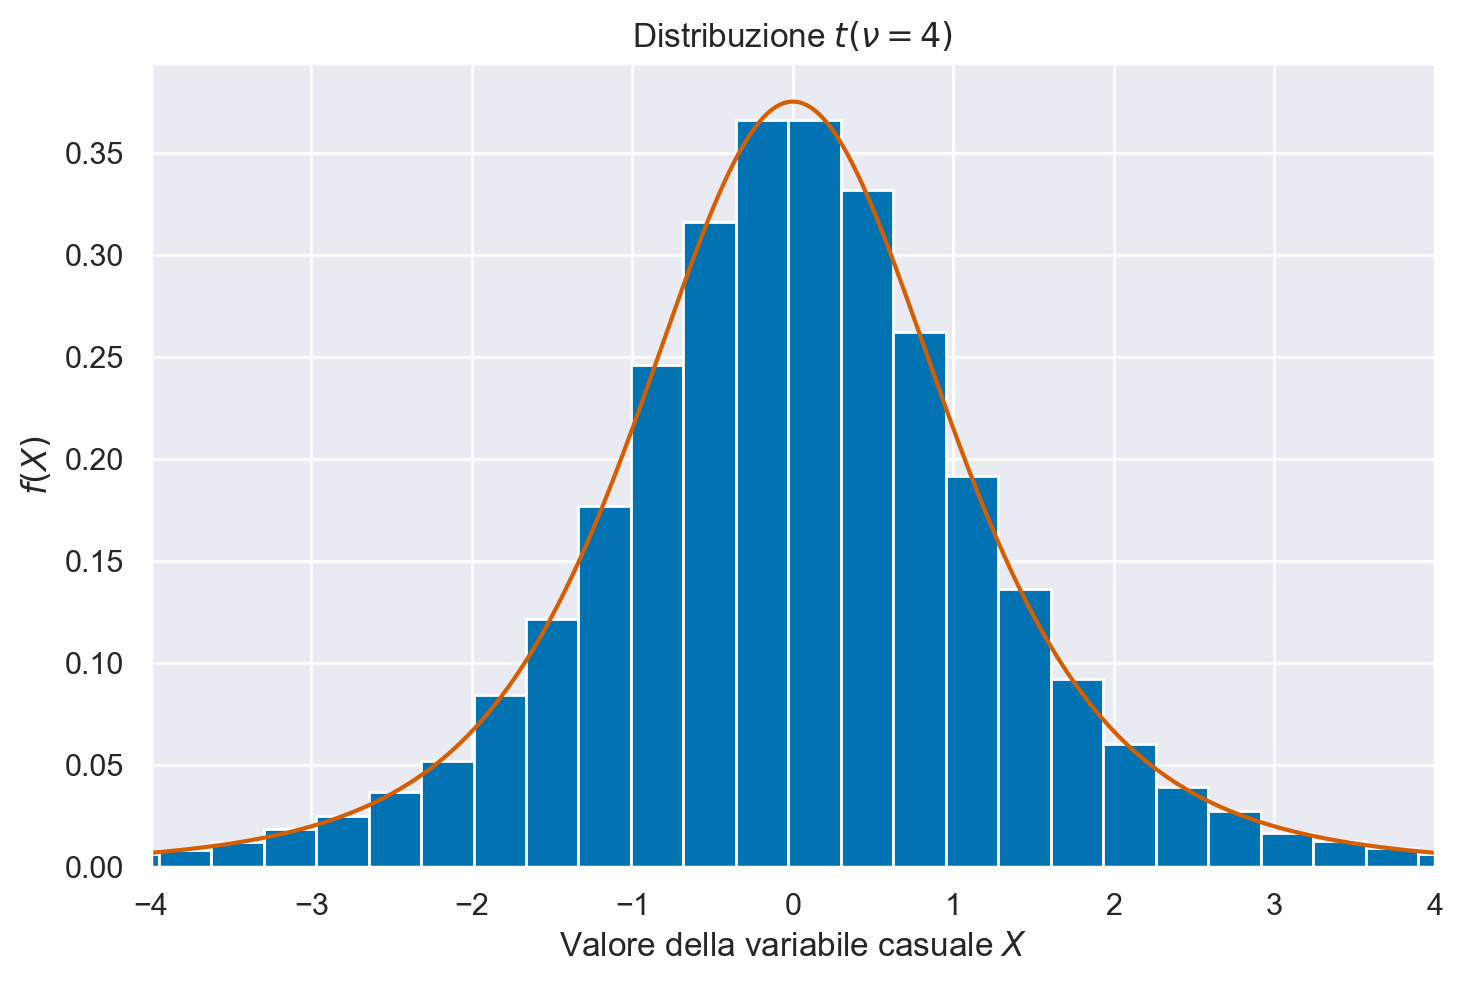

In [38]:
df = 4
size = 100001
# create x's
xs = np.linspace(-4, 4, 100001)
y_pdf = stats.t.pdf(xs, df=df)
# create random samples
samps = rng.standard_t(df=df, size=size)
# plot them
fig, ax = plt.subplots()
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=150, density=True)
plt.title("Distribuzione $t(\\nu=4)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(-4, 4)

## Distribuzione arbitraria di una variabile casuale distreta

Con la funzione `random.choices` è possible specificare i valori di una variabile casuale discreta con una distribuzione di massa di probabilità arbitraria. 

In [66]:
# Define the set of values
x_rv = [1, 2, 3, 4]
# Define the weights for each value
weights = [0.1, 0.1, 0.3, 0.5]

x_sample = rng.choice(x_rv, size=10, p=weights)
print(f"Random Sample: {x_sample}")

Random Sample: [4 2 3 1 1 3 4 1 3 2]


Nell'esempio, i pesi `weights` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di cinque volte maggiore dei valori `1` e `2`. 

Se aggiungiamo l'argomento `k` possiamo definire i pesi (indirettamente, le probabilità) dei diversi valori della variabile casuale che sono stati specificati. Nell'esempio, i pesi `[1, 1, 3, 6]` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di sei volte maggiore dei valori `1` e `2`. 

([<matplotlib.axis.XTick at 0x12b824b50>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

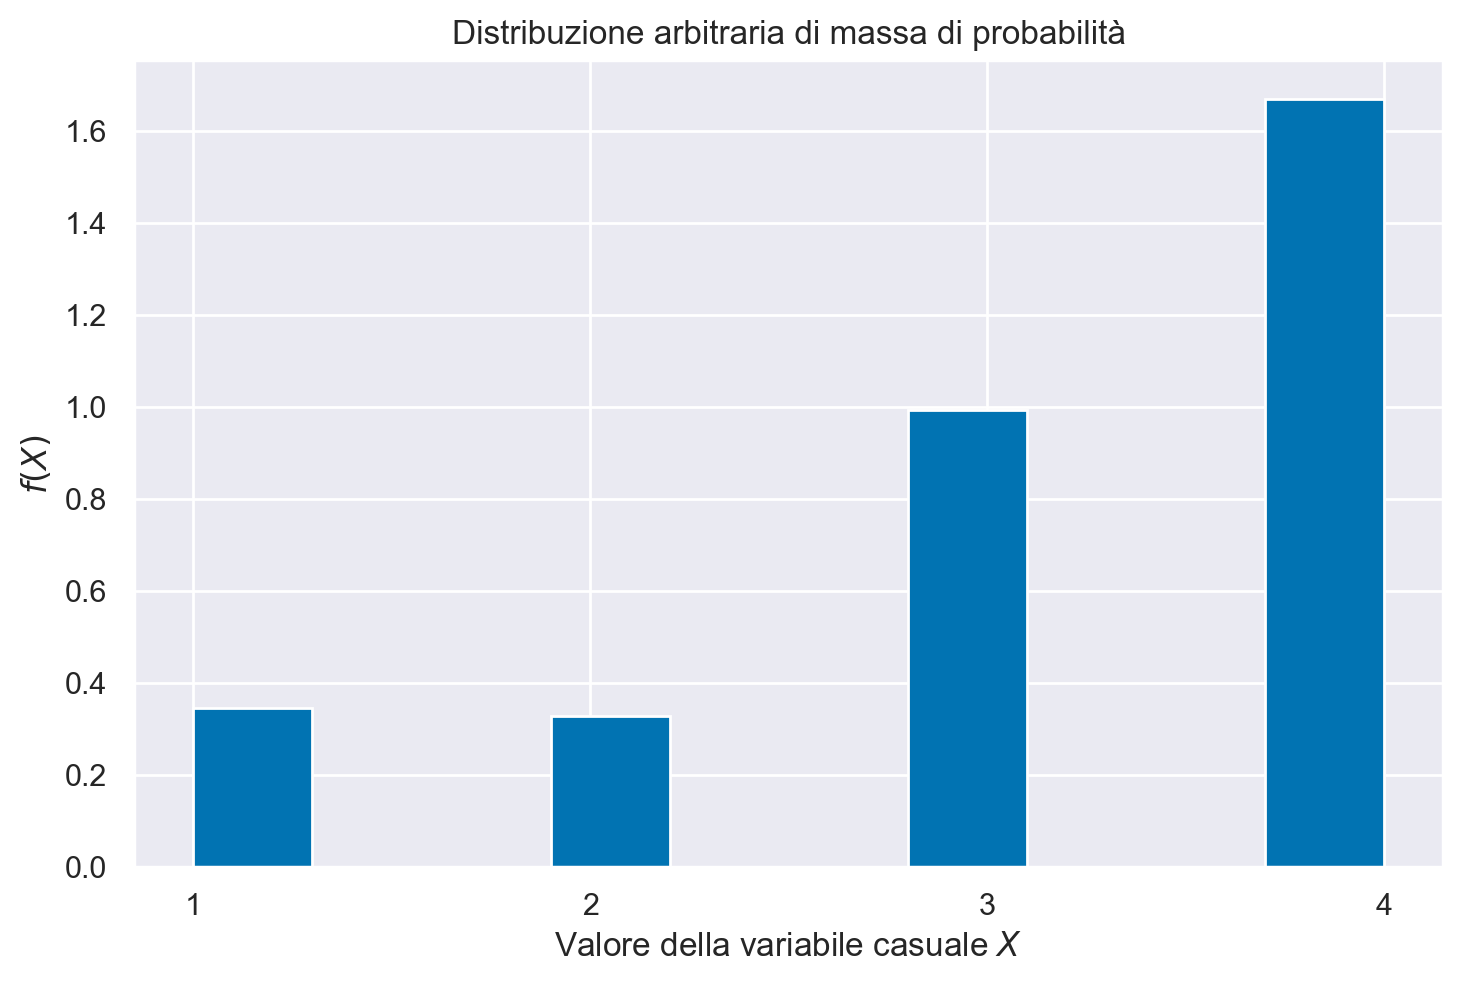

In [68]:
x = rng.choice(x_rv, size=10000, p=weights)
bins = plt.hist(x, density=True)
plt.title("Distribuzione arbitraria di massa di probabilità")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xticks(x_rv)

## Commenti e considerazioni finali

Dalla libreria `scipy.stats` utilizzo
- `.pdf` per ottenere i valori della funzione di densità di probabilità oppure `.pmf` per ottenere i valori della distribuzione di massa di probabilità; 
- `.ppf` per ottenere i quantili della distribuzione;
- `.cdf` per ottenere la probabilità -- nel caso di una variabile casuale continua, il valore della funzione di ripartizione, ovvero l'area sottesa alla curva di densità nella coda di sinistra; nel caso di una variabile casuale discreta, la somma delle probabilità della distribuzione di massa di probabilità dal valore minimo fino al valore indicato (incluso).

Dalla libreria `numpy` utilizzo
- `.random` per ottenere un campione di numeri casuali da una distribuzione.


## Watermark

In [ ]:
%watermark -n -u -v -iv -w -p pytensor